# Visual Object Recognition Using CNN
- Dataset is Fruits- 360 from Kaggle:https://www.kaggle.com/moltean/fruits

## __Import Libraries__

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')
import gc

Using TensorFlow backend.


In [2]:
gc.collect()

22

## Initialize the CNN 

In [3]:
model= Sequential()

W0713 21:55:14.307571 18608 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



## Add First Convolutional and Pooling  Layers

In [4]:
model.add(Conv2D(16, (5,5), input_shape = (100, 100, 3), activation= 'relu'))

W0713 21:55:16.680062 18608 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0713 21:55:16.680062 18608 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [5]:
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

W0713 21:55:19.440966 18608 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



## Add 2nd Convolutional and Max Pooling Layers

In [6]:
model.add(Conv2D(32, (5,5), activation= 'relu'))

In [7]:
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

## Add 3rd Convolutional and Max Pooling Layers

In [8]:
model.add(Conv2D(64, (5,5), activation= 'relu'))

In [9]:
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

## Add 4th Convolutional and Max Pooling Layers

In [10]:
model.add(Conv2D(128, (5,5), activation= 'relu'))

In [11]:
model.add(MaxPooling2D(pool_size = (2,2), strides = 2))

## Add Flattening Layer

In [12]:
model.add(Flatten())

## Add First Fully Connected Layer

In [13]:
model.add(Dense(units=512, activation ='relu'))

## Add Second Fully Connected Layer

In [14]:
model.add(Dense(units=256, activation ='relu'))

## Add the Ouptput Layer

In [15]:
model.add(Dense(units=111, activation ='softmax'))

## Compile the Model

In [16]:
model.compile(optimizer = 'adam', loss ='categorical_crossentropy', metrics = ['accuracy'] )

W0713 21:55:33.656512 18608 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0713 21:55:33.700747 18608 deprecation_wrapper.py:119] From C:\Users\benne\Anaconda3\envs\DSMLBC_Py36\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



## Visualize the Model

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 16)        1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 9, 9, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)         204928    
__________

In [252]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='cnn_block.png')

## __Load Datasets and Transform Images__ 
Code taken from Keras Documentation: 
https://keras.io/preprocessing/image/

In [207]:
from keras.preprocessing.image import ImageDataGenerator

In [208]:
# Create the instances:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        width_shift_range=.2, 
        height_shift_range=.2,
        zoom_range = 0.1,
        horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale=1./255)

# flow_from_directory methodology to augment images
train_set = train_datagen.flow_from_directory(
        'fruits-360/Training',
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical')

test_set = test_datagen.flow_from_directory(
        'fruits-360/Test',
        target_size=(100, 100),
        batch_size=1,
        class_mode='categorical', 
        shuffle = False)



Found 56781 images belonging to 111 classes.
Found 19053 images belonging to 111 classes.


## Early Stopping/ Best Model Conditions

In [20]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
es=EarlyStopping(monitor= 'val_loss', mode= 'min', verbose= 1, patience = 20)
mc = ModelCheckpoint('Best_Fruit_CNN0model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [21]:
import livelossplot
plot_losses = livelossplot.PlotLossesKeras()

## Train the Model 

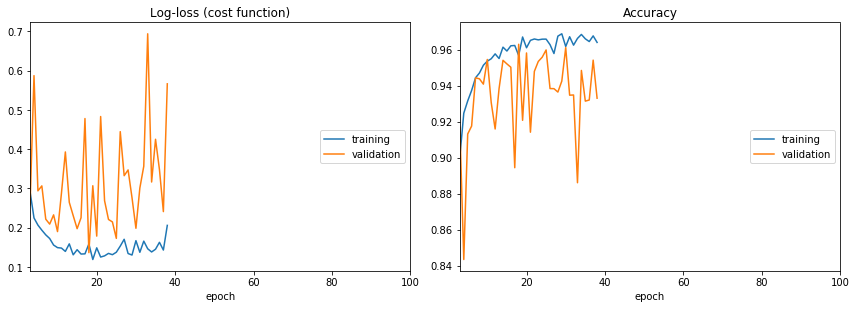

Log-loss (cost function):
training   (min:    0.119, max:    1.716, cur:    0.206)
validation (min:    0.137, max:    1.186, cur:    0.566)

Accuracy:
training   (min:    0.490, max:    0.969, cur:    0.964)
validation (min:    0.665, max:    0.963, cur:    0.933)

Epoch 00038: val_acc did not improve from 0.96295
Epoch 00038: early stopping


In [22]:
model.fit_generator(
        train_set,
        steps_per_epoch=1775,
        epochs=100,
        validation_data=test_set,
        verbose = 1, 
        callbacks= [es,plot_losses, mc],
        validation_steps=19053,
        use_multiprocessing = True, 
        workers = 0)

## Load the Best Model

In [185]:
from keras.models import load_model
saved_model = load_model('Best_Fruit_CNN0model.h5')

In [186]:
saved_model

In [187]:
train_loss, train_acc = saved_model.evaluate_generator(train_set, steps =1775, verbose = 1 )
test_loss, test_acc = saved_model.evaluate_generator(test_set, steps = 19053, verbose = 1)
print('Train Accuracy: %.3f, Train Loss: %.3f' % (train_acc, train_loss))
print('Test Accuracy: %.3f, Test Loss: %.3f' % (test_acc, test_loss))


19053/19053 [==============================] - 136s 7ms/step
Train Accuracy: 0.978, Train Loss: 0.071
Test Accuracy: 0.963, Test Loss: 0.137


In [218]:
pred = saved_model.predict_generator(test_set, steps= 19053, verbose = 1)

19053/19053 [==============================] - 145s 8ms/step


In [219]:
len(pred)

19053

## Mapping Predicted Labels to Image Files
 Methodology from: https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720

In [220]:
import numpy as np
import pandas as pd

In [221]:
pred_class_indices=np.argmax(pred, axis  = 1)

In [222]:
labels = (test_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in pred_class_indices]
len(predictions)

19053

## Map to a DataFrame

In [223]:
filenames=test_set.filenames
results=pd.DataFrame({"Actual":filenames,
                    "Predictions":predictions})
results.to_csv("Fruit_Results.csv",index=False)

In [224]:
df= pd.read_csv("Fruit_Results.csv")

In [225]:
df.head()

,Actual,Predictions
0,Apple Braeburn\321_100.jpg,Apple Braeburn
1,Apple Braeburn\322_100.jpg,Apple Braeburn
2,Apple Braeburn\323_100.jpg,Apple Braeburn
3,Apple Braeburn\324_100.jpg,Apple Braeburn
4,Apple Braeburn\325_100.jpg,Apple Braeburn


In [226]:
df['Actual']=df['Actual'].apply(lambda x: x.split('\\')[0])

In [227]:
df.describe()

,Actual,Predictions
count,19053,19053
unique,111,111
top,Grape Blue,Grape Blue
freq,328,328


### Table of Incorrect Predictions

In [228]:
df[(df['Actual'] != df['Predictions'])]

,Actual,Predictions
126,Apple Braeburn,Apple Red 2
127,Apple Braeburn,Apple Red 1
128,Apple Braeburn,Apple Red 1
129,Apple Braeburn,Apple Red 1
131,Apple Braeburn,Apple Red 1
132,Apple Braeburn,Apple Red 2
133,Apple Braeburn,Apple Red 2
134,Apple Braeburn,Apple Red 1
135,Apple Braeburn,Apple Red 2
136,Apple Braeburn,Apple Red 1


In [229]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [230]:
# adding a column "Correct/Incorrect' with True/False Values 
df['Correct/Incorrect']= df["Actual"] == df["Predictions"]

In [231]:
df.head()

,Actual,Predictions,Correct/Incorrect
0,Apple Braeburn,Apple Braeburn,True
1,Apple Braeburn,Apple Braeburn,True
2,Apple Braeburn,Apple Braeburn,True
3,Apple Braeburn,Apple Braeburn,True
4,Apple Braeburn,Apple Braeburn,True


In [232]:
df['Correct/Incorrect'].value_counts()

True     18347
False      706
Name: Correct/Incorrect, dtype: int64

### Plot Correct/ Incorrect Predictions

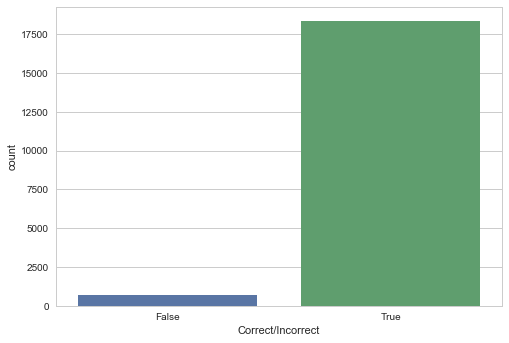

In [233]:
sns.set(style="whitegrid")
sns.countplot(df['Correct/Incorrect'])

### Import images for Visualization
 Methodology from: https://www.kaggle.com/fratdogan/fruits-360-with-keras

In [234]:
import glob
import os
import cv2

test_fruit_img = []
test_label = []
for dir_path in glob.glob("../*/fruits-360/Test/*"):
    img_label = dir_path.split("/")[-1]
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        img = cv2.imread(img_path)
        img = cv2.resize(img, (100, 100))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        test_fruit_img.append(img)
        test_label.append(img_label)
test_fruit_img = np.array(test_fruit_img)
test_label = np.array(test_label)
len(np.unique(test_label))

111

In [235]:
test_fruit_img.shape[0]

19053

 ### Visualization code taken from: 
 https://www.kaggle.com/aninditapani/cnn-from-scratch-with-98-accuracy

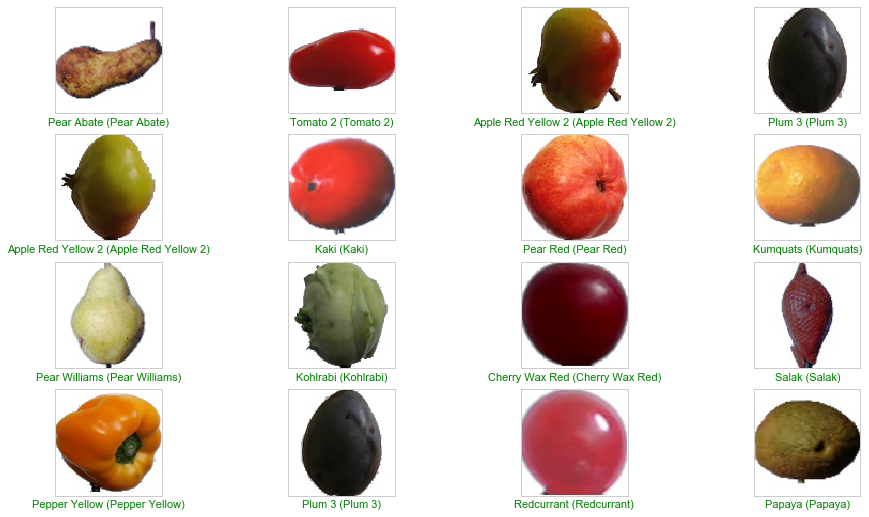

In [240]:
fig= plt.figure(figsize = (16, 9))
for i, idx in enumerate(np.random.choice(test_fruit_img.shape[0], size=16, replace=False)):
    ax = fig.add_subplot(4, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(test_fruit_img[idx]))
    plt.xlabel("{} ({})". format(df['Predictions'][idx],df['Actual'][idx]),
               color=("green" if df['Correct/Incorrect'][idx] == True else "red"))
                     

### Predict Multiple Fruits??

In [237]:
# Import multiple-test dataset

multi_fruits_img = []
multi_labels = []
for img_path in glob.glob(os.path.join("../*/fruits-360/test-multiple_fruits", "*.jpg")):
     img_label = img_path.split("/")[-1]
     img = cv2.imread(img_path)
     img = cv2.resize(img, (100, 100))
     img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
     multi_fruits_img.append(img)
     multi_labels.append(img_label)
multi_fruits_img = np.array(multi_fruits_img)
multi_labels = np.array(multi_labels)
len(np.unique(multi_labels))

106

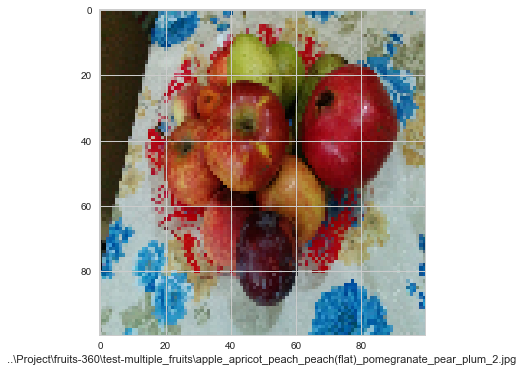

In [238]:
fig = plt.figure(figsize = (6, 6))
plt.imshow(multi_fruits_img[10])
plt.xlabel(multi_labels[10])

### Predictions

In [239]:
pred_multiple = saved_model.predict(multi_fruits_img, batch_size =1,verbose = 1)

106/106 [==============================] - 1s 8ms/step


In [241]:
pred_multiple_class_indices= np.argmax(pred_multiple, axis=1)

### Label Mapping

In [242]:
labels_multiple = (test_set.class_indices)
labels_multiple = dict((v,k) for k,v in labels_multiple.items())
multi_pred = [labels_multiple[k] for k in pred_multiple_class_indices]


In [243]:
import gc
gc.collect()

117815

### Create a DataFrame of Results

In [244]:
results_multiple=pd.DataFrame({"Actual":multi_labels,
                     "Predictions": multi_pred})
results_multiple.to_csv("Multiple_Fruits_Results.csv",index=False)

In [245]:
df_multiple = pd.read_csv("Multiple_Fruits_Results.csv")

In [246]:
df_multiple.head()

,Actual,Predictions
0,..\Project\fruits-360\test-multiple_fruits\app...,Carambula
1,..\Project\fruits-360\test-multiple_fruits\app...,Kaki
2,..\Project\fruits-360\test-multiple_fruits\app...,Limes
3,..\Project\fruits-360\test-multiple_fruits\app...,Kaki
4,..\Project\fruits-360\test-multiple_fruits\app...,Grape White


In [247]:
df_multiple['Actual']=df_multiple['Actual'].apply(lambda x: x.split('\\')[4])

In [248]:
df_multiple['Actual']=df_multiple['Actual'].apply(lambda x: x.split('.')[0])

In [249]:
df_multiple

,Actual,Predictions
0,apple,Carambula
1,apples1,Kaki
2,apples2,Limes
3,apples3,Kaki
4,apples4,Grape White
5,apples_peaches1,Tomato 3
6,apples_peaches2,Tomato 3
7,apples_pears,Quince
8,apple_apricot_nectarine_peach_peach(flat)_pome...,Tomato 3
9,apple_apricot_peach_peach(flat)_pomegranate_pe...,Kaki


### Visualize Results

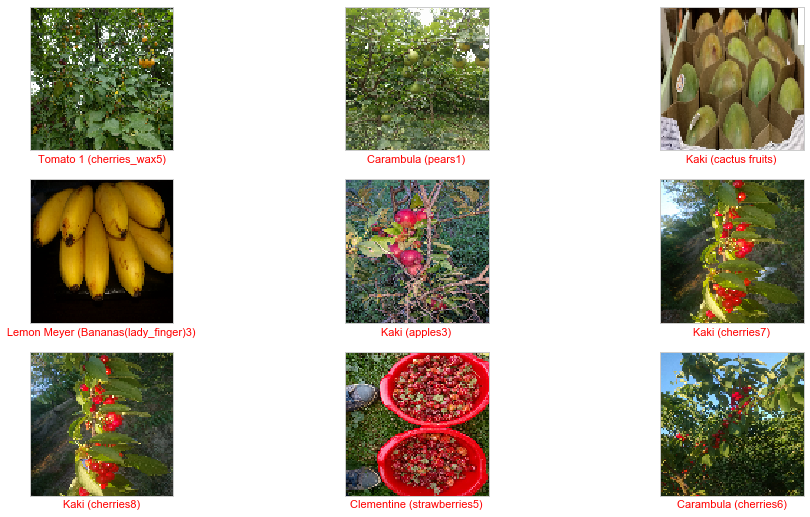

In [250]:
fig= plt.figure(figsize = (16, 9))
for i, idx in enumerate(np.random.choice(multi_fruits_img.shape[0], size=9, replace=False)):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(multi_fruits_img[idx]))
    plt.xlabel("{} ({})". format(df_multiple['Predictions'][idx], df_multiple['Actual'][idx]),
               color=("green" if df_multiple['Actual'][idx] == df_multiple['Predictions'][idx] else "red"))